# Import all required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn import metrics
import statsmodels.api as sm

from pandas.plotting import scatter_matrix

import sys
import warnings
%matplotlib inline

if not sys.warnoptions:
    warnings.simplefilter('ignore')

# Load the Data

In [2]:
salary_dataset= pd.read_csv('Salaries.csv')

In [ ]:
# describe the dataset
salary_dataset.describe()

In [ ]:
# salary dataset information to find the columns and count of the data

salary_dataset.info()

In [ ]:
# count the number of missing values for each feature

salary_dataset.isnull().sum()

In [6]:
#creating the dataframe from the given dataset

df=pd.DataFrame(salary_dataset)
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [7]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [8]:
#replacing some special character columns with proper name
df.rename(columns={'yrs.since.phd':'yrs since phd','yrs.service':'yrs service'},inplace=True)
df.columns

Index(['rank', 'discipline', 'yrs since phd', 'yrs service', 'sex', 'salary'], dtype='object')

In [9]:
#finding the special characters in the data frame

df.isin(['?']).sum(axis=0)

rank             0
discipline       0
yrs since phd    0
yrs service      0
sex              0
salary           0
dtype: int64

In [10]:
#assigning the dataset to a train data set 
train_data=[salary_dataset]
df.columns

Index(['rank', 'discipline', 'yrs since phd', 'yrs service', 'sex', 'salary'], dtype='object')

In [11]:
#running a loop for value_counts of each column to find out the unique values

for c in df.columns:
    print('----%s----' %c)
    print(df[c].value_counts())

----rank----
Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64
----discipline----
B    216
A    181
Name: discipline, dtype: int64
----yrs since phd----
4     19
28    16
8     14
20    13
19    13
13    12
17    12
12    12
38    11
23    11
21    11
39    10
10    10
11    10
31    10
30     9
22     9
15     9
14     9
9      9
25     9
33     8
35     8
37     8
29     8
27     8
18     8
16     8
3      8
40     7
26     6
24     6
32     6
7      6
6      6
5      6
45     6
2      5
43     5
36     5
49     4
46     4
1      4
42     4
41     4
34     3
56     2
44     1
47     1
48     1
51     1
52     1
54     1
Name: yrs since phd, dtype: int64
----yrs service----
3     22
19    19
7     18
8     18
23    16
18    15
2     15
9     15
11    14
4     13
1     13
0     11
27    11
6     11
10    11
20    10
31    10
30     9
15     9
28     9
16     8
14     8
22     8
38     8
5      8
25     8
26     7
17     6
36     6
21     6
40     5
35     5
12

In [12]:
#let us see how many unique categories we have in this property

salary=set(df['salary'])

In [13]:
print(salary)

{170000, 151575, 84000, 79916, 112696, 69700, 73800, 122960, 86100, 114778, 104542, 133217, 151650, 137317, 155750, 90215, 88175, 106608, 231545, 127100, 131205, 166024, 94350, 106639, 73877, 153750, 100522, 78000, 94384, 82099, 102580, 82100, 118971, 141500, 90304, 106689, 102600, 98510, 151768, 155865, 75996, 92391, 119015, 86250, 172272, 194800, 100600, 125192, 80139, 125196, 84240, 74000, 96545, 84273, 147765, 115000, 108875, 88400, 78162, 90450, 104800, 80225, 86373, 96614, 162150, 78182, 70000, 121200, 176500, 92550, 162200, 63900, 117150, 135585, 174500, 113068, 162221, 109000, 57800, 82379, 119250, 172505, 139750, 193000, 150000, 107008, 170500, 117256, 84500, 127512, 88600, 92700, 105000, 168500, 111168, 129600, 133700, 143940, 100938, 88650, 100944, 146000, 186960, 107100, 72300, 115313, 113278, 88709, 101000, 129676, 107150, 160400, 119450, 78500, 105128, 82600, 101036, 144050, 99000, 168635, 205500, 113341, 107200, 103106, 142023, 119500, 166605, 88795, 97000, 115435, 10110

In [14]:
#mapping the data into numerical data using map function

#df['salary']=df['salary'].map({'<60K':0,'>60K':1}).astype(int)

In [15]:

#let us check how many unique categories are there in the gender property

sex=set(df['sex'])
print(sex)

{'Female', 'Male'}


In [16]:
#mapping the values to numerical values
df['sex']=df['sex'].map({"Male":0,'Female':1}).astype(int)


In [17]:
#let us check how many unique categories are there in the rank property

rank=set(df['rank'])
print(rank)



{'Prof', 'AssocProf', 'AsstProf'}


In [18]:
#mapping the values to numberical values

df['rank']=df['rank'].map({"AsstProf":0,'Prof':1,'AssocProf':2}).astype(int)


In [19]:
#let us check how many unique category are there in the discipline property
discipline=set(df['discipline'])
print(discipline)

{'A', 'B'}


In [20]:
#mapping the values to numerical values
#df['discipline']=df['discipline'].map({'A':0,'B':1}).astype(int)


In [21]:
df.head(10)


,rank,discipline,yrs since phd,yrs service,sex,salary
0,1,B,19,18,0,139750
1,1,B,20,16,0,173200
2,0,B,4,3,0,79750
3,1,B,45,39,0,115000
4,1,B,40,41,0,141500
5,2,B,6,6,0,97000
6,1,B,30,23,0,175000
7,1,B,45,45,0,147765
8,1,B,21,20,0,119250
9,1,B,18,18,1,129000


<AxesSubplot:xlabel='yrs since phd'>

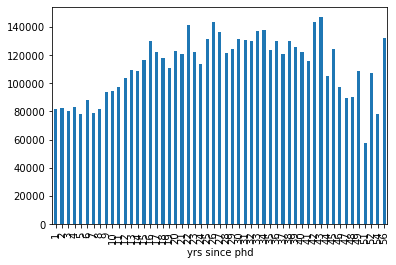

In [22]:
#plotting the bar graph for education against income to see the correlation between these two columns
df.groupby('yrs since phd').salary.mean().plot(kind='bar')


<AxesSubplot:xlabel='rank'>

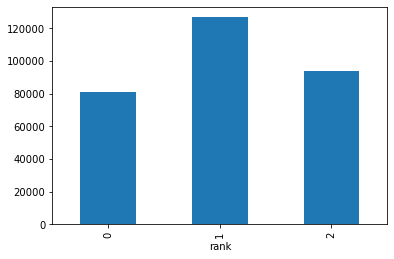

In [23]:
#plotting the bar graph for rank against income to see the correlation between these two columns
df.groupby('rank').salary.mean().plot(kind='bar')

<AxesSubplot:xlabel='sex'>

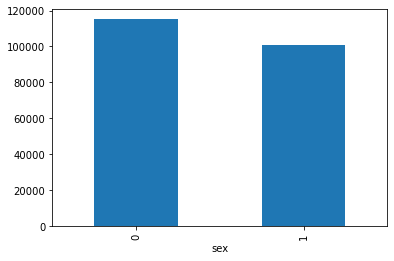

In [24]:
#plotting the bar graph for sex against income to see the correlation between these two columns
df.groupby('sex').salary.mean().plot(kind='bar')

<AxesSubplot:xlabel='discipline'>

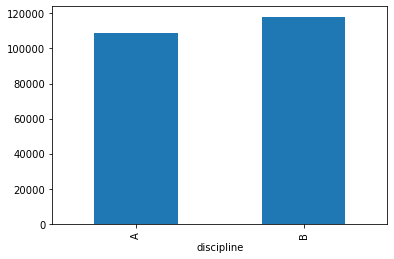

In [25]:
#plotting the bar graph for education against income to see the correlation between these two columns
df.groupby('discipline').salary.mean().plot(kind='bar')

<AxesSubplot:xlabel='yrs service'>

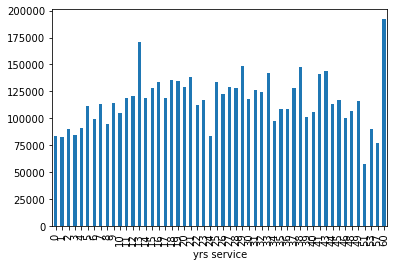

In [26]:
#plotting the bar graph for education against income to see the correlation between these two columns
df.groupby('yrs service').salary.mean().plot(kind='bar')

In [27]:
#use the heatmap function from seaborn to plot the correlation matrix

#corrmat = df.corr()
#f, ax = plt.subplots(figsize=(12,9))
#k = 6 
#cols = corrmat.nlargest(k, 'salary')['salary'].index
#cm=np.corrcoef(df[cols].values.T)
#sns.set(font_scale=1.25)
#hm=sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, yticklabels=cols.values, xtickvalues=cols.values)
#plt.show()

In [28]:


X=pd.DataFrame(np.c_[df['yrs since phd'],df['yrs service'],df['sex']],columns=
                  ['yrs since phd','yrs service','sex'])

In [29]:
Y=pd.DataFrame(df.salary)

In [30]:
#splitting data into 80% for training set and 20% for testing set so that we can set our accuracy
X_train,x_test,Y_train, y_test =train_test_split(X,Y,test_size=0.5,random_state=0)



In [31]:
# Importing C-Support Vector Classification from scikit-learn
from sklearn.svm import SVC

# Declaring the SVC with no tunning
classifier = SVC()

# Fitting the data. This is where the SVM will learn
classifier.fit(X_train, Y_train)

# Predicting the result and giving the accuracy
score = classifier.score(x_test, y_test)




In [32]:
print(score)

0.01507537688442211


In [33]:
#correlation matrix
corrmat = df.corr()

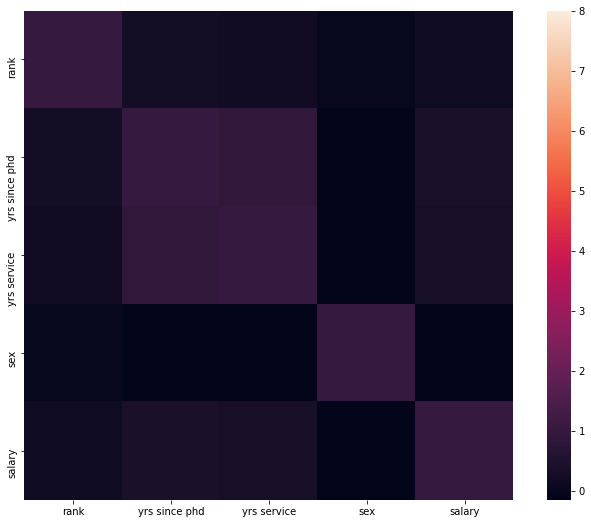

In [34]:
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=8, square=True);

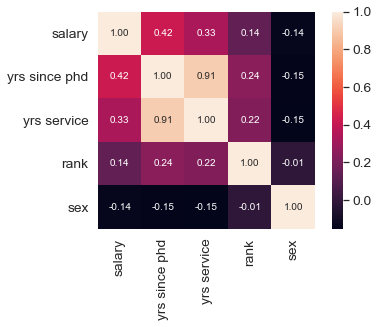

In [35]:
k=6 #number of variables for heatmap
cols = corrmat.nlargest(k, 'salary')['salary'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()